In [67]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly

In [68]:
import pandas as pd
import numpy as np
import cufflinks as cf
import tensorflow as tf
import matplotlib.pyplot as plt
import chart_studio.plotly as py

# contains functions that can create entire figures at once
import plotly.express as px

import seaborn as sns
%matplotlib inline

# allows to create graph objects for making more customized plots
import plotly.graph_objects as go

# for plotly jupyter support
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# use plotly locally
cf.go_offline()

In [4]:
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Dataset used: COVID19 Dataset from Kaggle

Resource: https://www.kaggle.com/datasets/imdevskp/corona-virus-report?resource=download

# 1. CSV File to DataFrame

In [5]:
data = pd.read_csv('country_wise_latest.csv')

In [6]:
data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


Using `rename()` on the column named `Country/Region` to `Country` for better accessibility

In [7]:
data = data.rename(columns={"Country/Region":"Country"})

In [8]:
data.head()

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


`value_counts()` to get the total number of rows(length)

In [9]:
data.Country.value_counts()

Afghanistan    1
Pakistan       1
Nepal          1
Netherlands    1
New Zealand    1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zimbabwe       1
Name: Country, Length: 187, dtype: int64

Spliting the Necessary Columns from the `data` Dataframe and create a new dataframe named `new_data`.

In [10]:
new_data = pd.DataFrame(data.loc[:, ['Country', 'Confirmed', 'Deaths', 'Active', 'Recovered', 'WHO Region']])

In [11]:
new_data.head()

,Country,Confirmed,Deaths,Active,Recovered,WHO Region
0,Afghanistan,36263,1269,9796,25198,Eastern Mediterranean
1,Albania,4880,144,1991,2745,Europe
2,Algeria,27973,1163,7973,18837,Africa
3,Andorra,907,52,52,803,Europe
4,Angola,950,41,667,242,Africa


# 2. Pie Chart for 5 Most Affected Countries by Corona

In [12]:
new_data = new_data.sort_values(by=['Confirmed'], ascending=False)

In [59]:
five_most_affected = new_data[:5]

In [60]:
five_most_affected

,Country,Confirmed,Deaths,Active,Recovered,WHO Region
173,US,4290259,148011,2816444,1325804,Americas
23,Brazil,2442375,87618,508116,1846641,Americas
79,India,1480073,33408,495499,951166,South-East Asia
138,Russia,816680,13334,201097,602249,Europe
154,South Africa,452529,7067,170537,274925,Africa


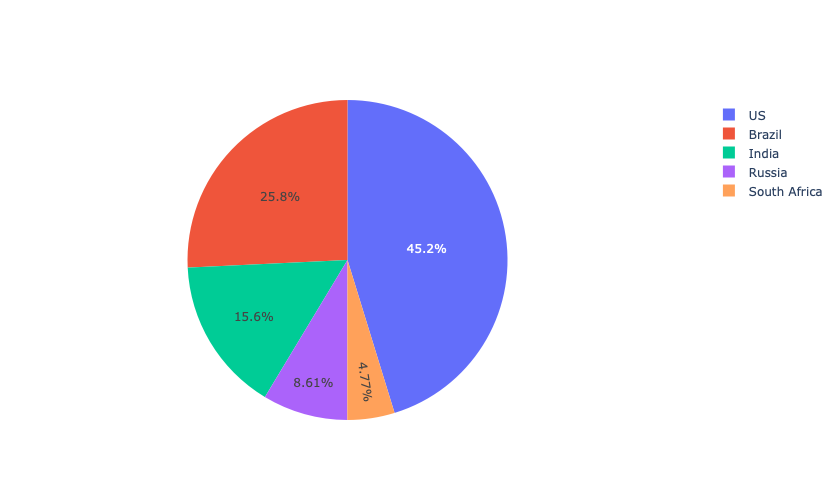

In [15]:
fig = go.Figure()

fig = go.Figure(data=[go.Pie(labels=five_most_affected.Country, 
                       values=five_most_affected.Confirmed)])
fig.update_layout(
    width=500,
    height=500,
    margin=dict(l=0, r=60),
)

# 3. Visualize Data Using Various Plots

In [39]:
pop_data = px.data.gapminder()
pop_data.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [40]:
pop_data['year'].max()

2007

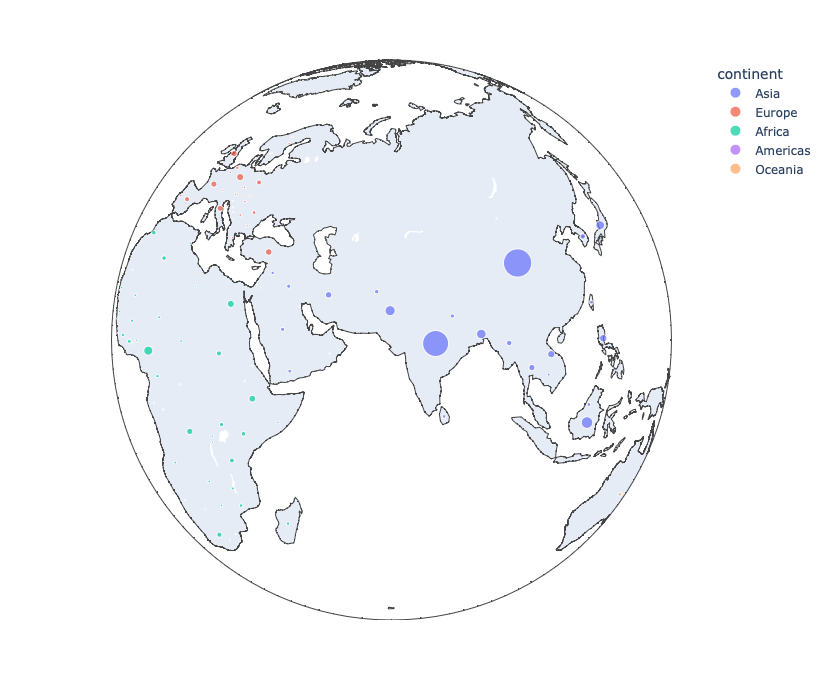

In [41]:
pop_2007 = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(pop_2007, locations="iso_alpha",
                     color="continent",
                     hover_name="country",
                     size="pop",
                     projection="orthographic",
                     height=700)
fig

In [55]:
pop_ind = px.data.gapminder().query("country == 'India'")

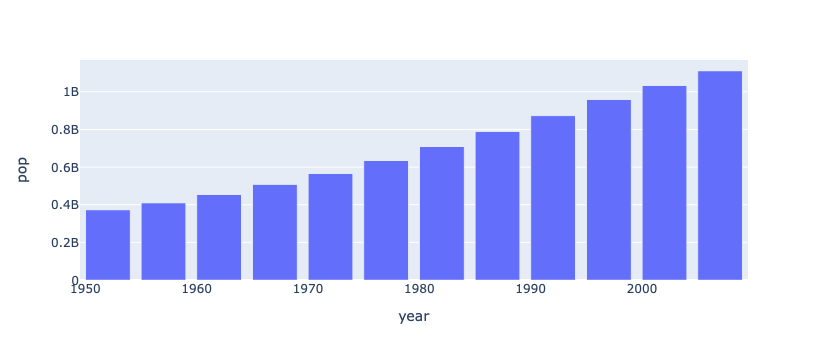

In [56]:
px.bar(pop_ind, x='year', y='pop')

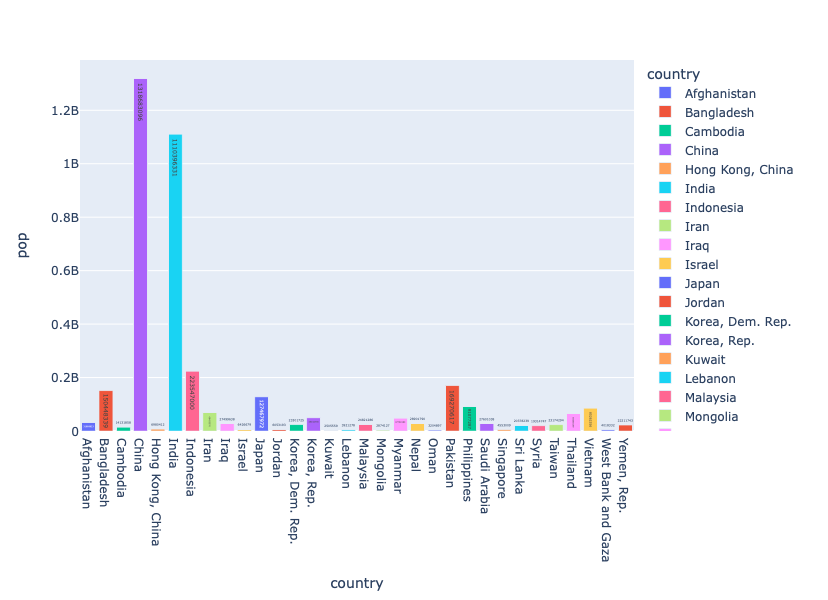

In [64]:
# pop > 2.e6 means greater than 2000000
df_asia = px.data.gapminder().query("continent == 'Asia' and year == 2007 and pop > 2.e6")
fig = px.bar(df_europe, y='pop', x='country', text='pop', color='country')
fig.update_layout(
    autosize=True,
    #width=1000,
    height=600
)

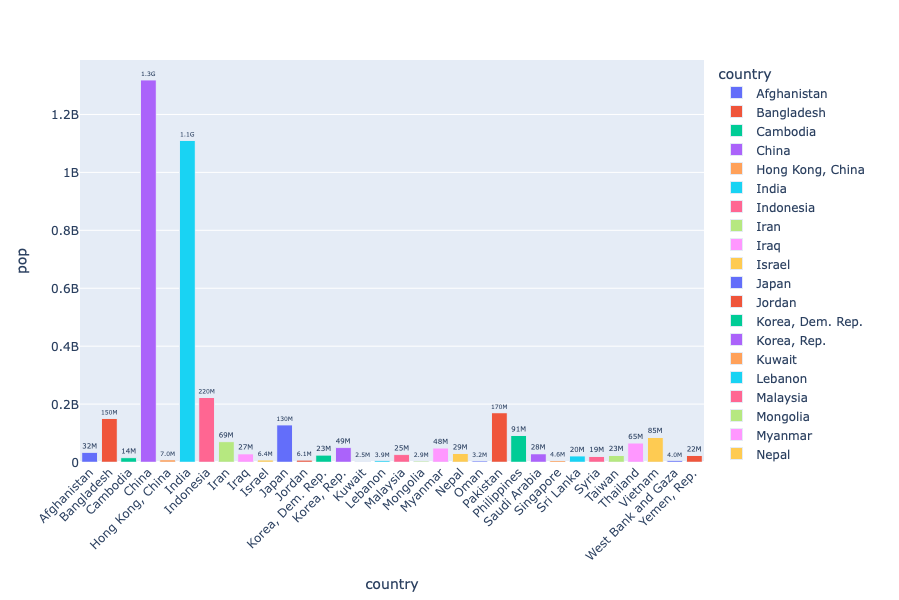

In [65]:
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Setting Minimum font size to fit the label
fig.update_layout(uniformtext_minsize=8)

# Rotate labels 45 degrees
fig.update_layout(xaxis_tickangle=-45, yaxis_tickangle=0)

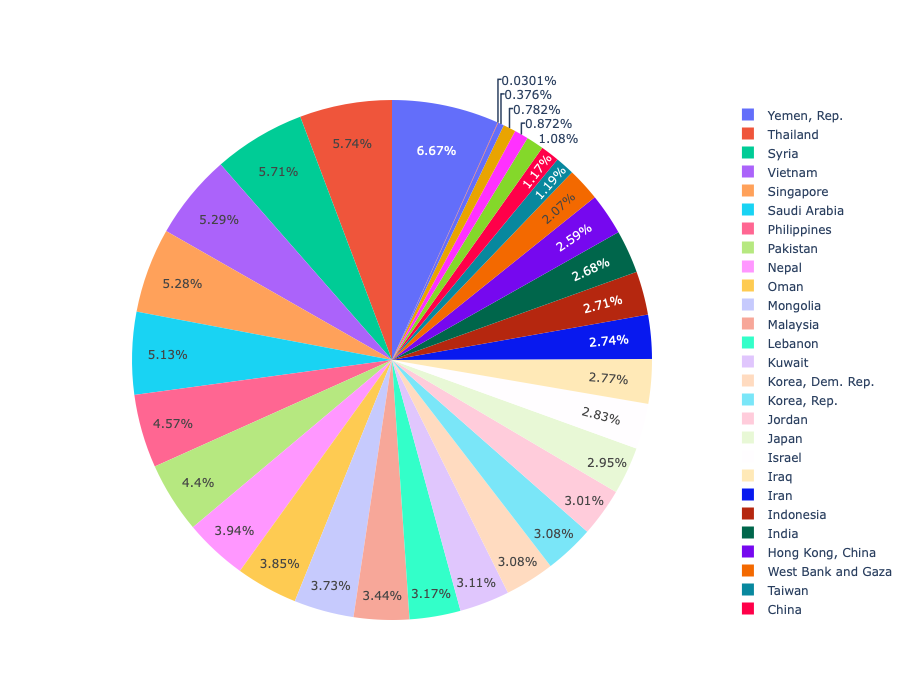

In [68]:
fig = go.Figure()

fig = go.Figure(data=[go.Pie(labels=df_asia.country, 
                       values=df_asia.iso_num)])
fig.update_layout(
    width=700,
    height=700,
    margin=dict(l=0, r=60),
)

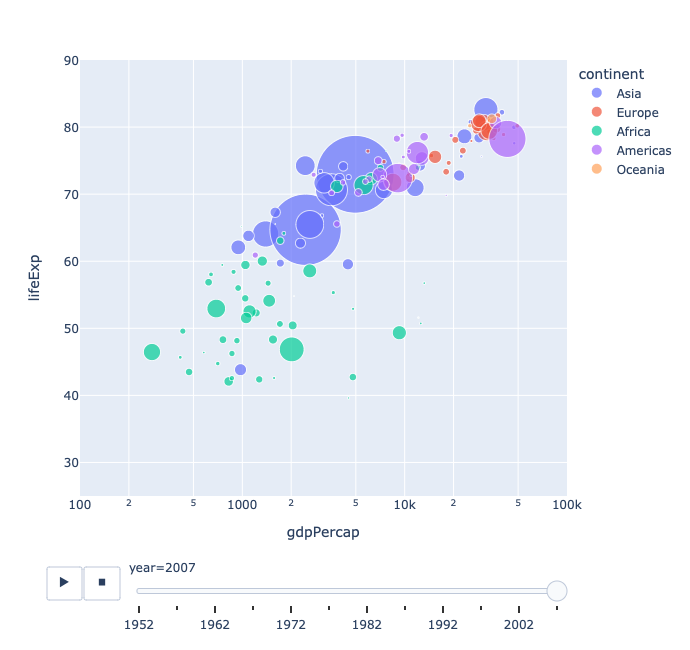

In [69]:
px.scatter(pop_data, 
           x="gdpPercap", y="lifeExp", 
           animation_frame="year", 
           animation_group="country",
           size="pop",
           height=650,
           color="continent", 
           hover_name="country",
           log_x=True, 
           size_max=55, 
           range_x=[100,100000], 
           range_y=[25,90])

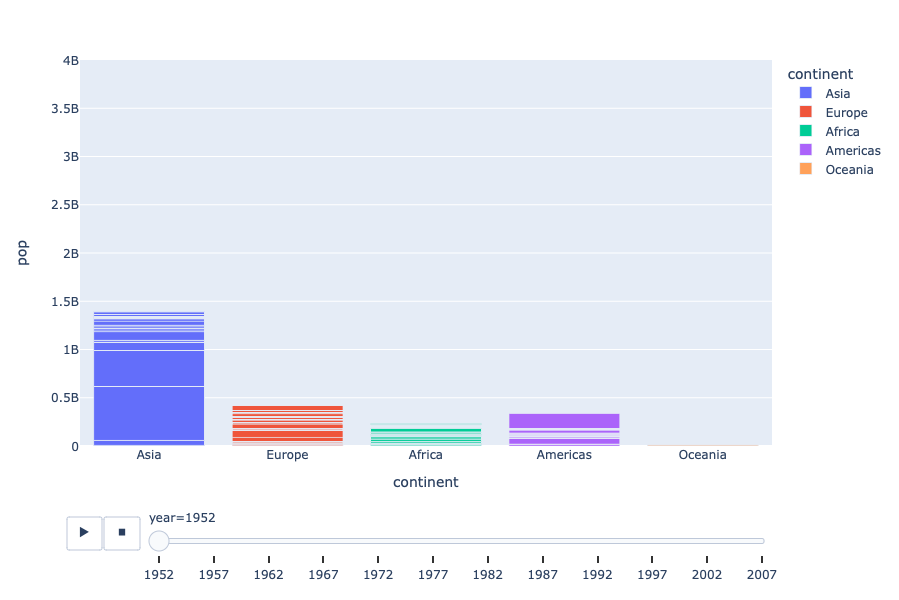

In [70]:
px.bar(pop_data, 
       x="continent", 
       y="pop", 
       color="continent",
       animation_frame="year", 
       animation_group="country",
       height=600,
       range_y=[0,4000000000])

# 4, 5, 6 

## Imports

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler # for scaling import data
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits # mnist data - numbers
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [13]:
data = load_digits()

In [16]:
feature = data.images # features from digits dataset
target = data.target # features from digits dataset

In [19]:
feature.dtype

dtype('float64')

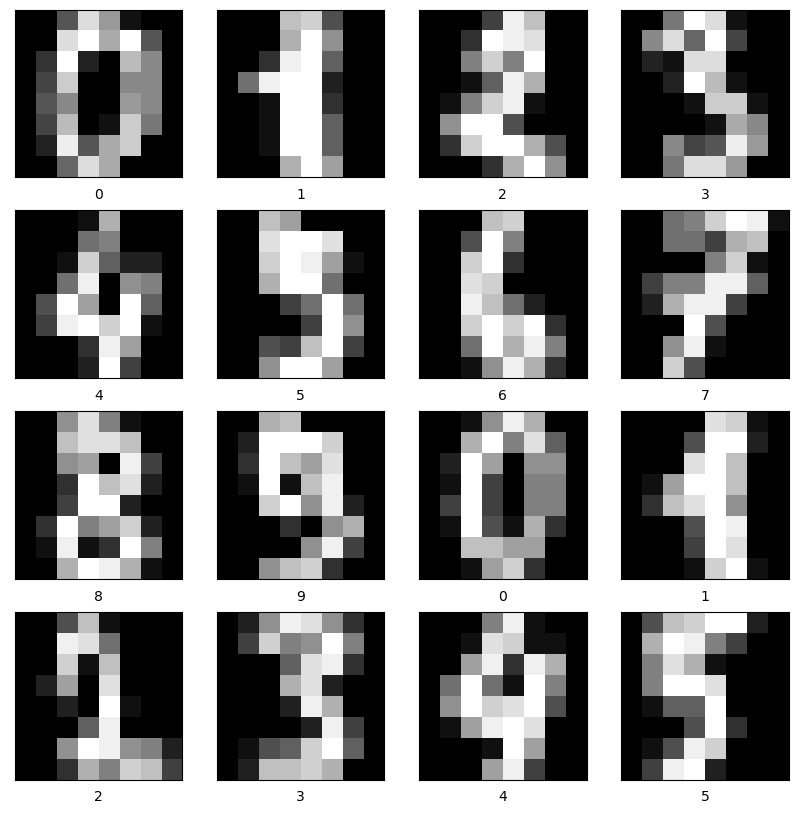

In [43]:
plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4, 4, i+1) # rows, columns, index of the current plot
    plt.xticks([])
    plt.yticks([])
    plt.imshow(feature[i], cmap='gray')
    plt.xlabel(target[i])

plt.show()

In [39]:
feature.shape

(1797, 8, 8)

In [45]:
target.shape

(1797,)

In [46]:
target[5]

5

In [41]:
feature[5]

array([[ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 14.,  0.,  0.],
       [ 0.,  0., 13., 16., 15., 10.,  1.,  0.],
       [ 0.,  0., 11., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  7., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  4., 16.,  9.,  0.],
       [ 0.,  0.,  5.,  4., 12., 16.,  4.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.]])

In [44]:
feature = feature.reshape((1797, 64, )) # reshaping the input before passing the input to MinMaxScaler

In [47]:
feature.shape

(1797, 64)

In [48]:
feature[5]

array([ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
       14.,  0.,  0.,  0.,  0., 13., 16., 15., 10.,  1.,  0.,  0.,  0.,
       11., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  7., 16.,  7.,
        0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  5.,  4.,
       12., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.])

### MinMaxScaler Usage
Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [51]:
min_max_scaling = MinMaxScaler()
X = min_max_scaling.fit_transform(feature)

In [52]:
X.shape

(1797, 64)

In [53]:
X[5]

array([0.    , 0.    , 0.75  , 0.625 , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.875 , 1.    , 1.    , 0.875 , 0.    , 0.    ,
       0.    , 0.    , 0.8125, 1.    , 0.9375, 0.625 , 0.0625, 0.    ,
       0.    , 0.    , 0.6875, 1.    , 1.    , 0.4375, 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.25  , 0.4375, 1.    , 0.5   , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.25  , 1.    , 0.5625, 0.    ,
       0.    , 0.    , 0.3125, 0.25  , 0.75  , 1.    , 0.25  , 0.    ,
       0.    , 0.    , 0.5625, 1.    , 1.    , 0.625 , 0.    , 0.    ])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    target, 
                                                    test_size=0.25,
                                                    random_state=42)

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [76]:
from sklearn.tree import DecisionTreeClassifier
model0 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model0.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [79]:
pred0 = model0.predict(X_test)

-------CLassification Report--------
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.86      0.86      0.86        37
           2       0.82      0.74      0.78        38
           3       0.93      0.83      0.87        46
           4       0.88      0.82      0.85        55
           5       0.85      0.90      0.88        59
           6       0.90      0.96      0.92        45
           7       0.82      0.88      0.85        41
           8       0.68      0.74      0.71        38
           9       0.86      0.90      0.88        48

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.86      0.86      0.86       450

--------Accuracy Score --------
0.86
-------Confusion Matrix -------


<AxesSubplot: >

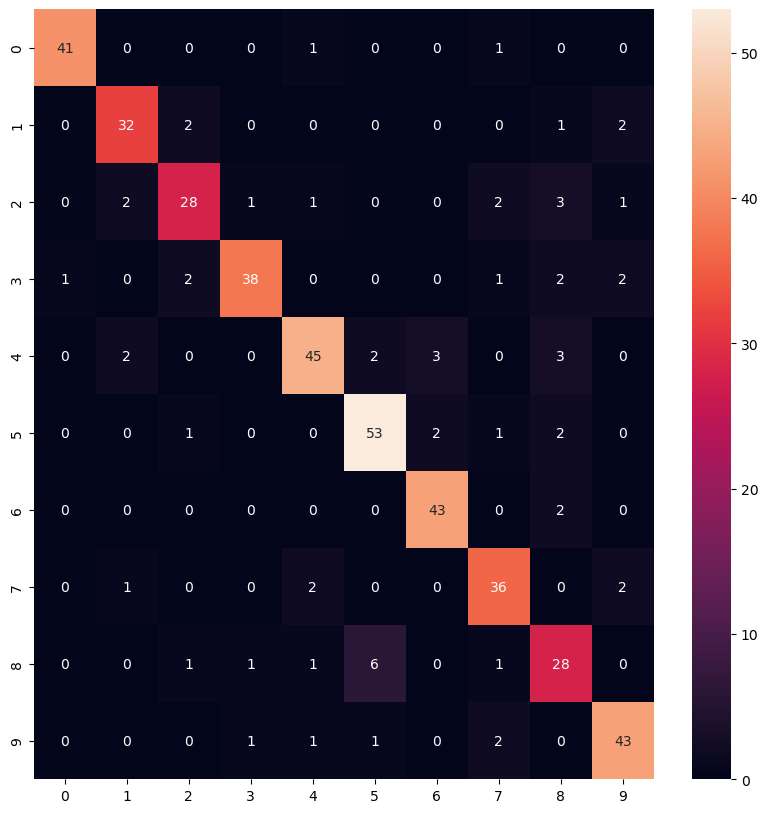

In [80]:
print("-------CLassification Report--------")
print(classification_report(y_test, pred0))

print("--------Accuracy Score --------")
print(accuracy_score(y_test, pred0))

print("-------Confusion Matrix -------")
plt.figure(figsize=(10, 10))

sns.heatmap(confusion_matrix(y_test, pred0), annot=True)

In [77]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

/Users/selva/enter/envs/dlenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [81]:
pred1 = model.predict(X_test)

-------CLassification Report--------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        37
           2       0.97      1.00      0.99        38
           3       1.00      0.93      0.97        46
           4       1.00      0.98      0.99        55
           5       0.93      0.95      0.94        59
           6       0.98      0.98      0.98        45
           7       1.00      0.98      0.99        41
           8       0.93      0.97      0.95        38
           9       0.94      0.96      0.95        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

--------Accuracy Score --------
0.9711111111111111
-------Confusion Matrix -------


<AxesSubplot: >

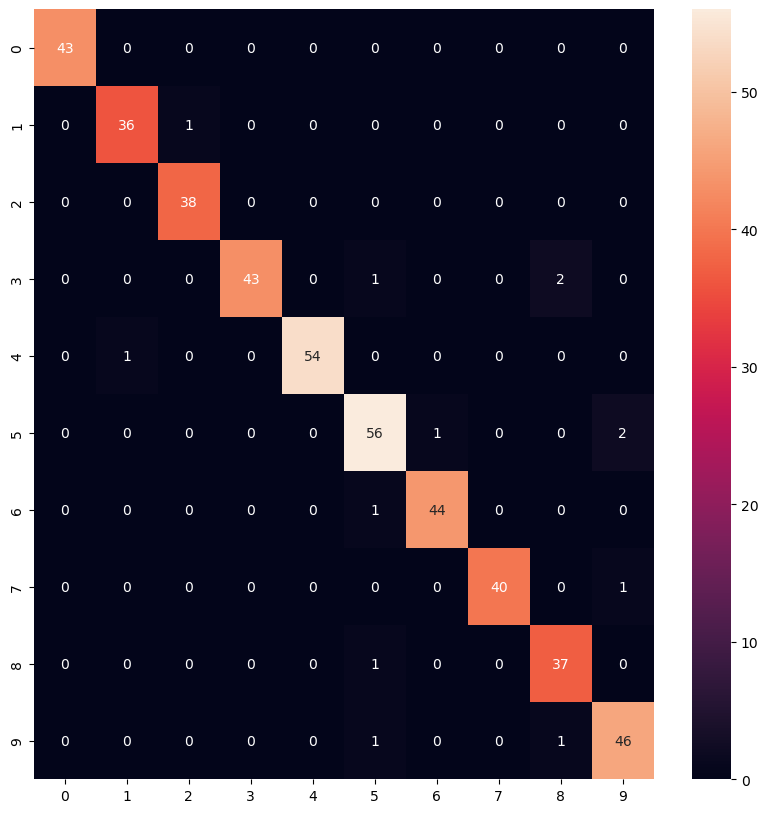

In [82]:
print("-------CLassification Report--------")
print(classification_report(y_test, pred1))

print("--------Accuracy Score --------")
print(accuracy_score(y_test, pred1))

print("-------Confusion Matrix -------")
plt.figure(figsize=(10, 10))

sns.heatmap(confusion_matrix(y_test, pred1), annot=True)

In [83]:
final = pd.DataFrame({'Actual': y_test, 'Predicted': pred1})

In [84]:
final[:50]

,Actual,Predicted
0,6,6
1,9,9
2,3,3
3,7,7
4,2,2
5,1,2
6,5,5
7,2,2
8,5,5
9,2,2


In [85]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(X_train, y_train)

GaussianNB()

In [86]:
pred2 = model.predict(X_test)

-------CLassification Report--------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        37
           2       0.97      1.00      0.99        38
           3       1.00      0.93      0.97        46
           4       1.00      0.98      0.99        55
           5       0.93      0.95      0.94        59
           6       0.98      0.98      0.98        45
           7       1.00      0.98      0.99        41
           8       0.93      0.97      0.95        38
           9       0.94      0.96      0.95        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

--------Accuracy Score --------
0.9711111111111111
-------Confusion Matrix -------


<AxesSubplot: >

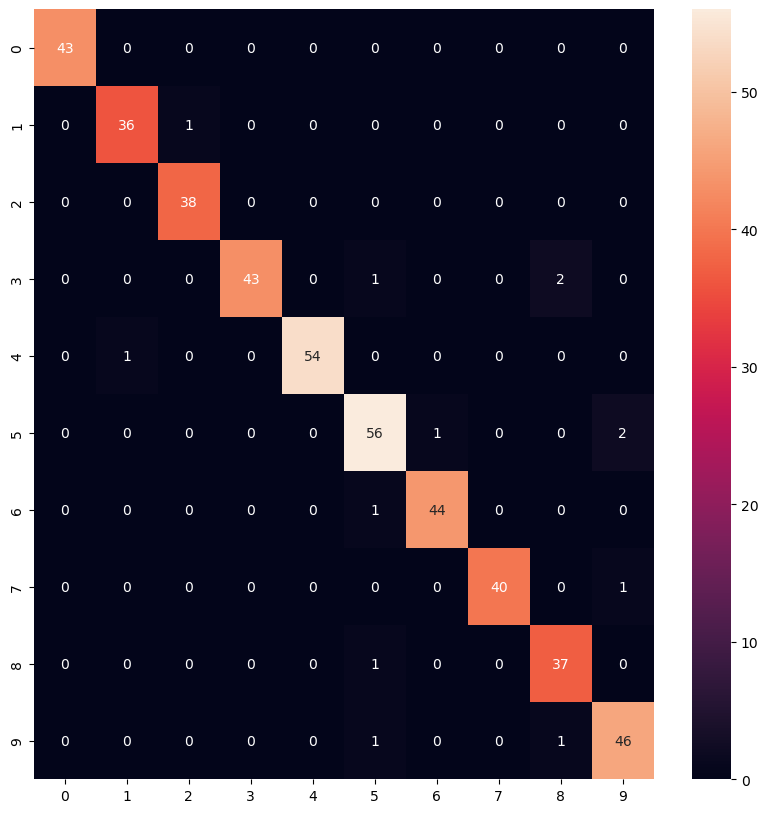

In [87]:
print("-------CLassification Report--------")
print(classification_report(y_test, pred2))

print("--------Accuracy Score --------")
print(accuracy_score(y_test, pred2))

print("-------Confusion Matrix -------")
plt.figure(figsize=(10, 10))

sns.heatmap(confusion_matrix(y_test, pred2), annot=True)